In [1]:
# Author: Myson Burch
# Last Modified: 10/13/2018

# Objective:
# Review the data set, and draw any conclusions you can find from the data set.
# 1) Try to identify the most popular scooter location
# 2) demonstrate your findings using data visualization tools
# 3) calculate operation time cost (Operation Time Cost: How long it takes to fully charge all the scooters)
# 4) come up with the most efficient scooter charging strategy.

# Submission Directions:
# Prepare your conclusions from the data set
# Your research and conclusions should be submitted as a link to a github repository
# It is encouraged that your repository hosts a Jupyter (formerly iPython) notebook.

In [2]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import sys, csv, os, math, subprocess, itertools, time, random

In [3]:
# Load in the data 
scooter_data = pd.read_csv('2019-XTern- Work Sample Assessment Data Science-DS.csv')

# Checked for any null values but there were none so assuming this going forward 
# scooter_data.dropna()

# Look at some general information about the data
print(scooter_data.shape)
print(' ')
print(scooter_data.head())
print(' ')
print(scooter_data.describe())

(25668, 4)
 
   scooter_id  xcoordinate  ycoordinate  power_level
0           0     0.906835     0.776484            0
1           1     0.928587     0.804964            2
2           2     0.904091     0.784043            1
3           3     0.906752     0.804461            0
4           4     0.900641     0.781683            4
 
         scooter_id   xcoordinate   ycoordinate   power_level
count  25668.000000  25668.000000  25668.000000  25668.000000
mean   12833.500000      0.491567      0.437083      2.496065
std     7409.857691      0.474552      0.515695      1.719245
min        0.000000     -0.300062     -0.290196      0.000000
25%     6416.750000      0.211375     -0.025581      1.000000
50%    12833.500000      0.403102      0.312886      2.000000
75%    19250.250000      0.929187      0.883513      4.000000
max    25667.000000      1.369517      1.357176      5.000000


In [4]:
# So just looking at this preview of the data, we can see that there are 
# over 25k scooters with an average charge of ~2.5 so about half
# Now we can try to find the most popular scooter location by doing the following:

# # This command will give us the most popular xcoordinate 
# scooter_data.xcoordinate.value_counts()
# # This command will give us the most popular ycoordinate
# scooter_data.ycoordinate.value_counts()

# Here we can see that each set of coordinates is unique so this may not be the 
# best way to determine the most popular location (next try plotting coordinates and infer)
scooter_data.groupby(['xcoordinate', 'ycoordinate']).size()

xcoordinate  ycoordinate
-0.300062    0.023457       1
-0.296863    0.019530       1
-0.292356    0.011618       1
-0.289945    0.030028       1
-0.289249    0.028089       1
-0.287271    0.017238       1
-0.287068    0.043936       1
-0.286689    0.016322       1
-0.286688    0.024083       1
-0.286404    0.013409       1
-0.286272    0.030051       1
-0.286010    0.028021       1
-0.285713    0.012381       1
-0.285698    0.029292       1
-0.285693    0.025639       1
-0.285535    0.024206       1
-0.285346    0.031370       1
-0.285266    0.031667       1
-0.285194    0.019801       1
-0.285120    0.017358       1
-0.285036    0.028278       1
-0.285029    0.012917       1
-0.284965    0.018872       1
-0.284532    0.013503       1
-0.284527    0.025511       1
-0.284416    0.038427       1
-0.284312    0.019447       1
-0.283791    0.012598       1
-0.283576    0.014815       1
-0.283572    0.044570       1
                           ..
 1.362107    0.893335       1
 1.362263    0.

Text(0, 0.5, 'Y Coord')

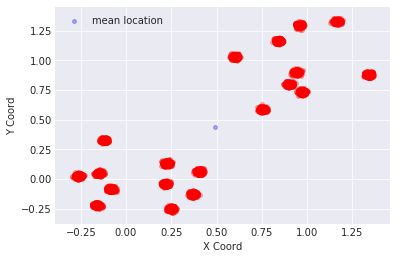

In [5]:
# Setting the plot style 
plt.style.use('seaborn-darkgrid')
# Plotting the points of interest 
plt.scatter(scooter_data.xcoordinate.values, scooter_data.ycoordinate.values, marker='o', color='r', s=15, alpha=0.3)
plt.scatter(scooter_data.xcoordinate.mean(), scooter_data.ycoordinate.mean(), marker='o', color='b', label='mean location',s=15, alpha=0.3)
# Label the axes 
plt.legend()
plt.xlabel('X Coord')
plt.ylabel('Y Coord')

# Interestingly, we can see that the scooters all form very dense small clusters so 
# they seem to be well distributed in the city/town/area and each small cluster 
# also seems to have similar number of scooters so it does not seem that there is a 'most' popular location
# but each location is equally popular 

# If we performed a clustering algorithm, we will see 
# the scooters clustered between 2 and maybe 4 clusters and then we could count the 
# number of scooters in each larger cluster and make that cluster a 'location' that is most popular

Number of scooters in area 0:  11936
Number of scooters in area 1:  13732


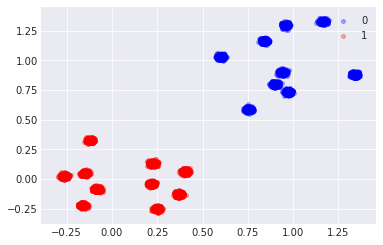

In [6]:
# Clustering 
from sklearn.cluster import KMeans
X = scooter_data.values[:,1:3]
# print(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
pred_cluster = kmeans.predict(X)

groups = [0, 1]
colors = ['b','r']
c_dict = dict(zip(groups, colors))

for elem in groups:
    idx = np.where(pred_cluster == elem)[0]
    plt.scatter(X[idx,0], X[idx,1], c=c_dict[elem], label=elem, s=15, alpha=0.3)
plt.legend()

# plt.scatter(X[:,0], X[:,1], c=pred_cluster, s=15,alpha=0.3, cmap='viridis')

scooter_counts = np.unique(pred_cluster, return_counts=True)
print('Number of scooters in area 0: ', scooter_counts[1][0])
print('Number of scooters in area 1: ', scooter_counts[1][1])

# Here, area 0 (the blue cluster of scooters) is the more popular location 

Number of scooters in area 0:  5813
Number of scooters in area 1:  4886
Number of scooters in area 2:  7919
Number of scooters in area 3:  7050


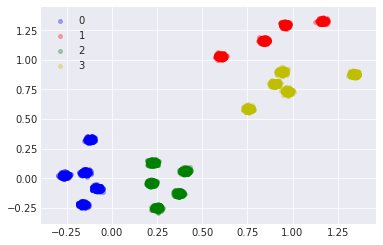

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
pred_cluster = kmeans.predict(X)

groups = [0, 1, 2, 3]
colors = ['b','r', 'g', 'y']
c_dict = dict(zip(groups, colors))

for elem in groups:
    idx = np.where(pred_cluster == elem)[0]
    plt.scatter(X[idx,0], X[idx,1], c=c_dict[elem], label=elem, s=15, alpha=0.3)
plt.legend()

scooter_counts = np.unique(pred_cluster, return_counts=True)
print('Number of scooters in area 0: ', scooter_counts[1][0])
print('Number of scooters in area 1: ', scooter_counts[1][1])
print('Number of scooters in area 2: ', scooter_counts[1][2])
print('Number of scooters in area 3: ', scooter_counts[1][3])

# Here, area 0 (the blue cluster of scooters) is the more popular location 

In [8]:
# With that analysis complete, we now can try to compute the operation time cost (how long to fully charge all scooters)

# Many assumptions have to be made at this point since the problem does not define the full capabilities of the bus
# So lets assume that the cost is composed only of the travel from the bus station to the scooters,
# charging the scooters and then traveling back (we are also assuming all coordinates in miles)

# Let us also assume that it takes a rate of 1 hour per 1 level of power to charger the scooter

# So as a base case (Case 0), lets assume that the bus can instantly pick up all the scooters at the mean location, 
# travel back to the station, charge them and then drop them off. The timing would be as follows:

# Time = Distance / Rate
bus_travel = (math.sqrt((20.19-scooter_data.xcoordinate.mean())**2+(20.19-scooter_data.ycoordinate.mean())**2))/50.0

# assuming that I can charge all of the scooters I have at once just means 
# that charging time will only be limited by the lowest charge scooter 
charge_time = 5.0 - scooter_data.power_level.min()

# multiplying by 2 because bus needs to drop scooters off (could be 3 if including parking the bus at the end)
# We are taking the max because we assume that the bus charges the scooters as it is driving so the total 
# time taken will be the max between driving time and charging time.

# The idea here is that the bus picks up the scooters and can only park in the station (20.19,20.19)
# but then heads out to drop off the scooters such that once the bus arrives back at the location that the
# scooters will be charges (multi-tasking)
total_time = max(2*bus_travel, charge_time)
print('Case 0 Operation time (hours): ', total_time)

# This time is obviously naiive because assuming a bus can carry over 25k scooters is not reasonable.
# This means that we have to consider multiple trips.
# It is also naiive because we assumed that the bus could travel to the mean location to pick up the scooters.

Case 0 Operation time (hours):  5.0


In [9]:
# From here, we can add constraints to the bus that will of course add to the time and call for a more efficient strategy.

# STRATEGY IDEA:
# So first, we need to contstrain the number of scooters that the bus can handle to simulate limited space.
# Lets say the size of each of the little dense clusters. Another constraint would be fuel but assuming 
# infinite or VERY efficient here.

# Since there is no restriction on actually having to put the scooters back where we picked them up,
# we can think that the bus picks up scooters and charges them as it drives to another location and drops the 
# charged scooters up and picks up ones that need charging (rinse and repeat until completion).

# Given that the clusters (scooters) are very close together, they will not be charged by the time the bus goes from 
# one scooter cluster to the next so it will have to go to the parking station many times and wait for the scooters to charge
# and go back and pick up more and repeat this process. 

# With the bus going 50 mi/hr, it can drive to park much faster than the scooters charge to full so a lot of time 
# is spent with the bus being idle, full and parked. We can see by this design the most time we are looking at is 
# the number of clusters times 5 hours (assuming we have scooters that are on empty). 

# This strategy can continue to get complex as we think about scenarios where we dont have fully empty scooters, 
# where we have some that are fully charged and some that aren't so the bus goes back to the area to get more 
# scooters that need to be charged, multiple drivers/buses etc. 

# So we have bouded our operation cost between 5.0 hours (infeasible) and approximately 100.0 hours.
# The upper bound gets much better as we keep tightening the constraints and using the bus more efficiently but this is 
# the worst case. 